# Laboratoire 0 - Exemple

Bienvenue dans ce laboratoire d'exemple. L'objectif ici est de vous familiariser avec l'environnement Jupyter, ainsi que les interactions que vous pouvez avoir avec le robot.

Jupyter nous sert d'interface pour appeler du code python. Débutons 

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation
mpl.rc('animation', html='html5') #display animated plots inline

from robot import Robot
from sensors import *
from visualization import Visualizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Modifiez la valeur de `ip_robot` selon le robot qui vous a été assigné.

In [20]:
ip_robot = '192.168.0.100'
robot = Robot(ip_robot)

In [21]:
robot.connect()

# Hokuyo

In [ ]:
hokuyo = HokuyoSensor()
robot.add_sensor(hokuyo)

In [ ]:
hokuyo.peek_data()

In [ ]:
from IPython.display import display,HTML,clear_output

for i in range(100):
    viz = Visualizer(hokuyo)
    viz.plot_data()
    time.sleep(0.1)
    clear_output(wait=True)

In [ ]:
viz.animate_sensor()

## Capteur IR Sharp

In [ ]:
sharp = SharpSensor(0)
robot.add_sensor(sharp)

sharp2 = SharpSensor(1)
robot.add_sensor(sharp2)

In [ ]:
for i in range(10000):
    print(sharp.peek_data())
    print(sharp2.peek_data())
    time.sleep(0.1)

In [ ]:
from IPython.display import display,HTML,clear_output

for i in range(2000):
    print(sharp.peek_data())
    time.sleep(0.02)
    clear_output(wait=True)

# Kinect

In [22]:
kinect = KinectRGBSensor()
robot.add_sensor(kinect)

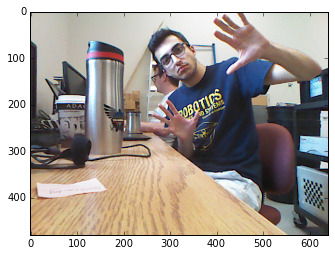

In [24]:
import base64
import matplotlib.image as mpimage

plt.imshow(kinect.peek_data())

In [ ]:
kinect.buffer[0]